[-0.01258566 -0.00156614  0.04207708 -0.00180545]


c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


(400, 600, 3)


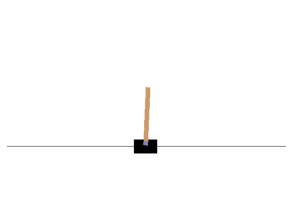

Discrete(2)
0.042077083
[-0.01261699  0.1929279   0.04204097 -0.28092128] 
 1.0 
 False 
 {}


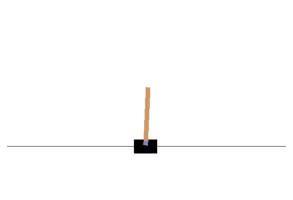

41.684 8.839917646675222 24.0 68.0


c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\matplotlib\animation.py:974: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  'Animation was deleted without rendering anything. This is '


'\n<link rel="stylesheet"\nhref="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css">\n<script language="javascript">\n  function isInternetExplorer() {\n    ua = navigator.userAgent;\n    /* MSIE used to detect old browsers and Trident used to newer ones*/\n    return ua.indexOf("MSIE ") > -1 || ua.indexOf("Trident/") > -1;\n  }\n\n  /* Define the Animation class */\n  function Animation(frames, img_id, slider_id, interval, loop_select_id){\n    this.img_id = img_id;\n    this.slider_id = slider_id;\n    this.loop_select_id = loop_select_id;\n    this.interval = interval;\n    this.current_frame = 0;\n    this.direction = 0;\n    this.timer = null;\n    this.frames = new Array(frames.length);\n\n    for (var i=0; i<frames.length; i++)\n    {\n     this.frames[i] = new Image();\n     this.frames[i].src = frames[i];\n    }\n    var slider = document.getElementById(this.slider_id);\n    slider.max = this.frames.length - 1;\n    if (isInternetExplorer()) {\n      

In [2]:
import gym
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

environment = gym.make('CartPole-v1')

environment.seed(42)

observation = environment.reset()

print(
    observation)  # cart's horizontal position, its velocity, the angle of the pole (0 = vertical), and the angular velocity.

image = environment.render(mode="rgb_array")
print(image.shape)


def plot_environment(environment, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    image = environment.render(mode="rgb_array")
    plt.imshow(image)
    plt.axis("off")

    return image


plot_environment(environment)

plt.show()

print(environment.action_space)

print(observation[2])

action = 1  # accelerate right
observation, reward, done, info = environment.step(action)

print(observation, '\n', reward, '\n', done, '\n', info)
plot_environment(environment)
plt.show()


def basic_policy(observation):
    angle = observation[2]

    return 0 if angle < 0 else 1


totals = []

for episode in range(500):
    episode_rewards = 0
    observation = environment.reset()

    for step in range(200):
        action = basic_policy(observation)
        observation, reward, done, info = environment.step(action)
        episode_rewards += reward

        if done:
            break

    totals.append(episode_rewards)

print(np.mean(totals), np.std(totals), np.min(totals), np.max(totals))
# Let's visualize one episode:
environment.seed(42)

frames = []

observation = environment.reset()

for step in range(200):
    image = environment.render(mode='rgb_array')
    frames.append(image)
    action = basic_policy(observation)

    observation, reward, done, info = environment.step(action)

    if done:
        break

# Now show the animation:

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch


def plot_animation(frames, repeat=False, interval=40):
    figure = plt.figure()
    patch = plt.imshow(X=frames[0])
    plt.axis('off')
    animation = matplotlib.animation.FuncAnimation(fig=figure, func=update_scene, frames=len(frames),
                                                   fargs=(frames, patch), interval=interval, repeat=repeat)

    plt.close()
    return animation


plot_animation(frames=frames)
animation = plot_animation(frames=frames)
animation.to_jshtml(fps=30, embed_frames=True, default_mode=None)
